In [1]:
import lightgbm as lgb
from sklearn import datasets
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn import model_selection
import matplotlib.pyplot as plt

from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

/Users/wanghanxuan/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)
/Users/wanghanxuan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_conve

In [2]:
data_train = pd.read_csv('/Users/wanghanxuan/Desktop/BDT Lecture/5001 Foundation of Data Analytics/Kaggle/train.csv')
data_test = pd.read_csv('/Users/wanghanxuan/Desktop/BDT Lecture/5001 Foundation of Data Analytics/Kaggle/test.csv')

In [3]:
data = pd.concat([data_train,data_test], axis = 0).drop(['id','random_state'], axis = 1)

In [4]:
#data['penalty'] = LabelEncoder().fit_transform(data['penalty'])
data['alpha'] = LabelEncoder().fit_transform(data['alpha'])
def fun(x):
    if x == -1:
        return 8
    else:
        return x
data['n_jobs'] = data['n_jobs'].apply(lambda x: fun(x))

In [5]:
def penalty(x):
    if x == 'none':
        x = 0
    elif x =='l2':
        x = 1
    elif x =='l1':
        x = 2
    elif x =='elasticnet':
        x = 3
    return x

In [6]:
data['penalty'] = data['penalty'].apply(lambda x: penalty(x))

In [7]:
data.index = range(len(data))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
alpha                   500 non-null int64
flip_y                  500 non-null float64
l1_ratio                500 non-null float64
max_iter                500 non-null int64
n_classes               500 non-null int64
n_clusters_per_class    500 non-null int64
n_features              500 non-null int64
n_informative           500 non-null int64
n_jobs                  500 non-null int64
n_samples               500 non-null int64
penalty                 500 non-null int64
scale                   500 non-null float64
time                    400 non-null float64
dtypes: float64(4), int64(9)
memory usage: 50.9 KB


In [8]:
#import packages
import tensorflow as tf
import numpy as np
import os
import math
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'} #mute warnings



In [9]:
#import numpy array to DataSet
train_x = data.iloc[0:400,0:12]
train_y = data.iloc[0:400,12]

In [10]:
test_x = data.iloc[400:500,0:12]
test_y = data.iloc[400:500,12]

In [11]:
# get training data
# train_x, test_x, train_y, test_y = train_test_split(data1,label,test_size=0.2,random_state=5)

In [12]:
# Test data is *not* used when calculating the mean and std
train_x = minmax_scale(train_x, feature_range=(0, 1), axis=0, copy=True)
test_x = minmax_scale(test_x, feature_range=(0, 1), axis=0, copy=True)
# mean = train_x.mean(axis=0)
# std = train_x.std(axis=0)
# train_x = (train_x - mean) / std
# test_x = (test_x - mean) / std

In [13]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras import regularizers

Using TensorFlow backend.


In [15]:
def build_model():
    model = keras.Sequential()
    model.add(Dense(256, activation='relu', input_dim=12))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    #model.add(Dropout(0.5))
    model.add(Dense(256, activation='relu',kernel_regularizer=regularizers.l2(0.01)))
    
#   model.add(Dense(128, activation='relu'))
    
    #model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))

    
    model.add(Dense(1, activation='relu'))


    #optimizer = keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)


    model.compile(loss='mse',
                    optimizer='adam',
                    metrics=['mae'])
    
    
    
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               3328      
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 135,169
Trainable params: 135,169
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Display training progress by printing a single dot for each completed epoch
EPOCHS = 500

# Store training stats
history = model.fit(train_x, train_y, epochs=EPOCHS,
                    
                    validation_split=0.1, verbose=1,
                    
                    batch_size=5)

Train on 360 samples, validate on 40 samples
Epoch 1/500
360/360 [==============================] - 1s 2ms/step - loss: 26.6000 - mean_absolute_error: 2.6530 - val_loss: 12.6166 - val_mean_absolute_error: 2.3545
Epoch 2/500
360/360 [==============================] - 0s 328us/step - loss: 17.2284 - mean_absolute_error: 2.1312 - val_loss: 8.2784 - val_mean_absolute_error: 1.9076
Epoch 3/500
360/360 [==============================] - 0s 341us/step - loss: 13.5763 - mean_absolute_error: 1.7933 - val_loss: 6.5804 - val_mean_absolute_error: 1.6335
Epoch 4/500
360/360 [==============================] - 0s 373us/step - loss: 10.5359 - mean_absolute_error: 1.5270 - val_loss: 6.0875 - val_mean_absolute_error: 1.6275
Epoch 5/500
360/360 [==============================] - 0s 363us/step - loss: 8.1882 - mean_absolute_error: 1.3433 - val_loss: 4.1014 - val_mean_absolute_error: 0.9181
Epoch 6/500
360/360 [==============================] - 0s 357us/step - loss: 8.3135 - mean_absolute_error: 1.3975 - v

360/360 [==============================] - 0s 567us/step - loss: 2.3444 - mean_absolute_error: 0.7636 - val_loss: 2.8159 - val_mean_absolute_error: 0.9029
Epoch 50/500
360/360 [==============================] - 0s 405us/step - loss: 2.9050 - mean_absolute_error: 0.8551 - val_loss: 3.9442 - val_mean_absolute_error: 1.3228
Epoch 51/500
360/360 [==============================] - 0s 539us/step - loss: 3.0351 - mean_absolute_error: 0.8146 - val_loss: 2.3606 - val_mean_absolute_error: 0.7477
Epoch 52/500
360/360 [==============================] - 0s 582us/step - loss: 2.5642 - mean_absolute_error: 0.7322 - val_loss: 2.5828 - val_mean_absolute_error: 0.7132
Epoch 53/500
360/360 [==============================] - 0s 640us/step - loss: 2.2214 - mean_absolute_error: 0.7135 - val_loss: 3.2733 - val_mean_absolute_error: 0.8489
Epoch 54/500
360/360 [==============================] - 0s 369us/step - loss: 2.0333 - mean_absolute_error: 0.6907 - val_loss: 2.0192 - val_mean_absolute_error: 0.6178
Epoch

Epoch 98/500
360/360 [==============================] - 0s 428us/step - loss: 1.1117 - mean_absolute_error: 0.4589 - val_loss: 1.7481 - val_mean_absolute_error: 0.5932
Epoch 99/500
360/360 [==============================] - 0s 433us/step - loss: 0.9855 - mean_absolute_error: 0.4006 - val_loss: 1.8823 - val_mean_absolute_error: 0.6346
Epoch 100/500
360/360 [==============================] - 0s 398us/step - loss: 0.8764 - mean_absolute_error: 0.3855 - val_loss: 1.4840 - val_mean_absolute_error: 0.5885
Epoch 101/500
360/360 [==============================] - 0s 395us/step - loss: 1.1841 - mean_absolute_error: 0.4962 - val_loss: 3.4017 - val_mean_absolute_error: 1.0077
Epoch 102/500
360/360 [==============================] - 0s 433us/step - loss: 3.3817 - mean_absolute_error: 0.9329 - val_loss: 6.2308 - val_mean_absolute_error: 1.4259
Epoch 103/500
360/360 [==============================] - 0s 398us/step - loss: 2.0636 - mean_absolute_error: 0.6781 - val_loss: 3.0622 - val_mean_absolute_er

360/360 [==============================] - 0s 387us/step - loss: 1.1766 - mean_absolute_error: 0.5209 - val_loss: 1.6567 - val_mean_absolute_error: 0.7733
Epoch 147/500
360/360 [==============================] - 0s 425us/step - loss: 0.9589 - mean_absolute_error: 0.4265 - val_loss: 1.0409 - val_mean_absolute_error: 0.4768
Epoch 148/500
360/360 [==============================] - 0s 445us/step - loss: 0.8974 - mean_absolute_error: 0.3938 - val_loss: 1.8456 - val_mean_absolute_error: 0.6645
Epoch 149/500
360/360 [==============================] - 0s 360us/step - loss: 0.9960 - mean_absolute_error: 0.4318 - val_loss: 1.6426 - val_mean_absolute_error: 0.6654
Epoch 150/500
360/360 [==============================] - 0s 483us/step - loss: 1.1830 - mean_absolute_error: 0.4781 - val_loss: 1.7993 - val_mean_absolute_error: 0.6640
Epoch 151/500
360/360 [==============================] - 0s 424us/step - loss: 0.7977 - mean_absolute_error: 0.3796 - val_loss: 1.1632 - val_mean_absolute_error: 0.5422


360/360 [==============================] - 0s 388us/step - loss: 0.8180 - mean_absolute_error: 0.3685 - val_loss: 2.3461 - val_mean_absolute_error: 0.7327
Epoch 195/500
360/360 [==============================] - 0s 374us/step - loss: 2.6395 - mean_absolute_error: 0.8373 - val_loss: 5.0439 - val_mean_absolute_error: 1.1544
Epoch 196/500
360/360 [==============================] - 0s 346us/step - loss: 1.6533 - mean_absolute_error: 0.6358 - val_loss: 1.0681 - val_mean_absolute_error: 0.5397
Epoch 197/500
360/360 [==============================] - 0s 325us/step - loss: 0.7651 - mean_absolute_error: 0.3639 - val_loss: 1.6864 - val_mean_absolute_error: 0.7400
Epoch 198/500
360/360 [==============================] - 0s 336us/step - loss: 0.6200 - mean_absolute_error: 0.3298 - val_loss: 1.0268 - val_mean_absolute_error: 0.5275
Epoch 199/500
360/360 [==============================] - 0s 350us/step - loss: 0.4675 - mean_absolute_error: 0.2454 - val_loss: 1.0270 - val_mean_absolute_error: 0.4675


360/360 [==============================] - 0s 495us/step - loss: 0.3575 - mean_absolute_error: 0.2133 - val_loss: 1.1163 - val_mean_absolute_error: 0.5692
Epoch 243/500
360/360 [==============================] - 0s 428us/step - loss: 0.3536 - mean_absolute_error: 0.2285 - val_loss: 0.8768 - val_mean_absolute_error: 0.4877
Epoch 244/500
360/360 [==============================] - 0s 491us/step - loss: 0.3633 - mean_absolute_error: 0.2357 - val_loss: 0.9182 - val_mean_absolute_error: 0.5392
Epoch 245/500
360/360 [==============================] - 0s 669us/step - loss: 0.3524 - mean_absolute_error: 0.2158 - val_loss: 0.8466 - val_mean_absolute_error: 0.4930
Epoch 246/500
360/360 [==============================] - 0s 611us/step - loss: 0.9795 - mean_absolute_error: 0.4501 - val_loss: 1.0862 - val_mean_absolute_error: 0.6417
Epoch 247/500
360/360 [==============================] - 0s 418us/step - loss: 1.2115 - mean_absolute_error: 0.5211 - val_loss: 1.7950 - val_mean_absolute_error: 0.8465


360/360 [==============================] - 0s 445us/step - loss: 0.3582 - mean_absolute_error: 0.2348 - val_loss: 1.0415 - val_mean_absolute_error: 0.5300
Epoch 291/500
360/360 [==============================] - 0s 460us/step - loss: 0.3810 - mean_absolute_error: 0.2498 - val_loss: 0.7505 - val_mean_absolute_error: 0.4984
Epoch 292/500
360/360 [==============================] - 0s 395us/step - loss: 0.3092 - mean_absolute_error: 0.2072 - val_loss: 0.8135 - val_mean_absolute_error: 0.4692
Epoch 293/500
360/360 [==============================] - 0s 488us/step - loss: 0.3069 - mean_absolute_error: 0.1981 - val_loss: 0.8496 - val_mean_absolute_error: 0.4862
Epoch 294/500
360/360 [==============================] - 0s 573us/step - loss: 0.4799 - mean_absolute_error: 0.3031 - val_loss: 0.8936 - val_mean_absolute_error: 0.5193
Epoch 295/500
360/360 [==============================] - 0s 494us/step - loss: 0.6366 - mean_absolute_error: 0.3521 - val_loss: 0.8938 - val_mean_absolute_error: 0.5531


360/360 [==============================] - 0s 502us/step - loss: 0.2907 - mean_absolute_error: 0.2111 - val_loss: 0.6737 - val_mean_absolute_error: 0.4509
Epoch 339/500
360/360 [==============================] - 0s 430us/step - loss: 0.2800 - mean_absolute_error: 0.2030 - val_loss: 0.7191 - val_mean_absolute_error: 0.4818
Epoch 340/500
360/360 [==============================] - 0s 352us/step - loss: 0.4222 - mean_absolute_error: 0.3077 - val_loss: 1.0005 - val_mean_absolute_error: 0.6789
Epoch 341/500
360/360 [==============================] - 0s 343us/step - loss: 0.5001 - mean_absolute_error: 0.3403 - val_loss: 0.9137 - val_mean_absolute_error: 0.5460
Epoch 342/500
360/360 [==============================] - 0s 369us/step - loss: 0.2756 - mean_absolute_error: 0.1940 - val_loss: 0.6908 - val_mean_absolute_error: 0.4720
Epoch 343/500
360/360 [==============================] - 0s 623us/step - loss: 0.3875 - mean_absolute_error: 0.2946 - val_loss: 0.7544 - val_mean_absolute_error: 0.4945


360/360 [==============================] - 0s 587us/step - loss: 0.2133 - mean_absolute_error: 0.1486 - val_loss: 0.6408 - val_mean_absolute_error: 0.4594
Epoch 387/500
360/360 [==============================] - 0s 555us/step - loss: 0.1964 - mean_absolute_error: 0.1406 - val_loss: 0.7029 - val_mean_absolute_error: 0.4526
Epoch 388/500
360/360 [==============================] - 0s 701us/step - loss: 0.2313 - mean_absolute_error: 0.1819 - val_loss: 0.6270 - val_mean_absolute_error: 0.4523
Epoch 389/500
360/360 [==============================] - 0s 434us/step - loss: 0.1855 - mean_absolute_error: 0.1306 - val_loss: 0.5919 - val_mean_absolute_error: 0.4435
Epoch 390/500
360/360 [==============================] - 0s 472us/step - loss: 0.2379 - mean_absolute_error: 0.1972 - val_loss: 0.7351 - val_mean_absolute_error: 0.4971
Epoch 391/500
360/360 [==============================] - 0s 546us/step - loss: 0.2071 - mean_absolute_error: 0.1582 - val_loss: 0.6697 - val_mean_absolute_error: 0.4633


360/360 [==============================] - 0s 389us/step - loss: 0.3880 - mean_absolute_error: 0.3024 - val_loss: 0.8232 - val_mean_absolute_error: 0.5265
Epoch 435/500
360/360 [==============================] - 0s 394us/step - loss: 0.2673 - mean_absolute_error: 0.1948 - val_loss: 0.7000 - val_mean_absolute_error: 0.4742
Epoch 436/500
360/360 [==============================] - 0s 404us/step - loss: 0.2349 - mean_absolute_error: 0.1890 - val_loss: 0.6671 - val_mean_absolute_error: 0.4596
Epoch 437/500
360/360 [==============================] - 0s 373us/step - loss: 0.1999 - mean_absolute_error: 0.1552 - val_loss: 0.7547 - val_mean_absolute_error: 0.4957
Epoch 438/500
360/360 [==============================] - 0s 392us/step - loss: 0.2025 - mean_absolute_error: 0.1557 - val_loss: 0.7762 - val_mean_absolute_error: 0.4912
Epoch 439/500
360/360 [==============================] - 0s 380us/step - loss: 0.1795 - mean_absolute_error: 0.1413 - val_loss: 0.7139 - val_mean_absolute_error: 0.5035


360/360 [==============================] - 0s 374us/step - loss: 0.7767 - mean_absolute_error: 0.4719 - val_loss: 0.6615 - val_mean_absolute_error: 0.4905
Epoch 483/500
360/360 [==============================] - 0s 371us/step - loss: 0.6531 - mean_absolute_error: 0.3982 - val_loss: 0.6836 - val_mean_absolute_error: 0.4635
Epoch 484/500
360/360 [==============================] - 0s 361us/step - loss: 0.5861 - mean_absolute_error: 0.3460 - val_loss: 0.6384 - val_mean_absolute_error: 0.4939
Epoch 485/500
360/360 [==============================] - 0s 367us/step - loss: 0.5834 - mean_absolute_error: 0.4144 - val_loss: 0.7701 - val_mean_absolute_error: 0.5174
Epoch 486/500
360/360 [==============================] - 0s 346us/step - loss: 0.2477 - mean_absolute_error: 0.2239 - val_loss: 0.7092 - val_mean_absolute_error: 0.4850
Epoch 487/500
360/360 [==============================] - 0s 352us/step - loss: 0.2013 - mean_absolute_error: 0.1606 - val_loss: 0.6590 - val_mean_absolute_error: 0.4605


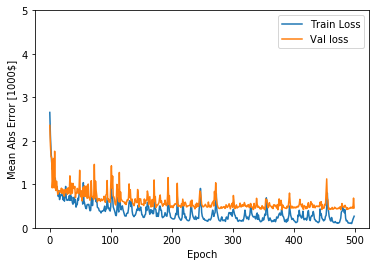

In [17]:
import matplotlib.pyplot as plt


def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [1000$]')
    plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
    plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
    plt.legend()
    plt.ylim([0, 5])
  
plot_history(history)

In [18]:
[loss, mae] = model.evaluate(train_x, train_y, verbose=0)

print("Testing set Mean Abs Error: ${:7.2f}".format(mae * 1000))

Testing set Mean Abs Error: $ 194.20


In [19]:
test_predictions = model.predict(test_x)

In [20]:
y_predict = pd.DataFrame(test_predictions)

a = list(range(100))
ID = pd.DataFrame(a)

pre = pd.concat([ID, y_predict], axis = 1)

pre.columns = ['Id','time']

pre.to_csv('5001_kaggle_prediction.csv',index = None)

In [21]:
loss

0.22449786901474

In [1116]:
y_predict[0:40]

,0
0,0.895666
1,8.543901
2,0.256701
3,0.932554
4,1.691309
5,6.309775
6,2.589355
7,0.362030
8,10.609193
9,0.256701


In [1074]:
data

,alpha,flip_y,l1_ratio,max_iter,n_classes,n_clusters_per_class,n_features,n_informative,n_jobs,n_samples,penalty,scale,time
0,0,0.074798,0.304083,417,4,3,327,7,8,1089,0,24.242009,0.409987
1,1,0.077781,0.727744,578,4,5,373,7,1,790,2,54.626302,3.950953
2,2,0.030196,0.745885,588,2,5,1198,6,2,428,0,17.999964,0.368702
3,1,0.057261,0.474605,829,6,5,313,7,4,877,0,82.257222,1.004559
4,1,0.073728,0.395049,167,8,5,644,11,2,216,3,95.515601,0.802800
5,1,0.097483,0.358837,986,4,2,861,6,4,1396,2,31.973447,7.916113
6,0,0.095324,0.758565,929,5,2,691,6,2,908,0,98.238367,2.206062
7,0,0.040463,0.282841,422,9,5,737,8,8,677,2,54.628206,2.407143
8,2,0.025639,0.766176,308,2,4,1191,9,8,498,2,54.166346,1.002341
9,1,0.024620,0.249018,510,9,5,803,10,8,1380,1,75.048054,1.607144
